## CartPole 滑行

> **問題**：如果彼得想要逃離狼的追捕，他需要能夠比狼移動得更快。我們將看看彼得如何學習滑行，特別是如何利用 Q-Learning 來保持平衡。

首先，讓我們安裝 gym 並導入所需的庫：


In [1]:
#code block 1

## 建立一個平衡車環境


In [ ]:
#code block 2

要了解環境如何運作，讓我們進行一個短暫的模擬，執行100步。


In [ ]:
#code block 3

在模擬過程中，我們需要獲取觀測值以決定如何行動。事實上，`step` 函數會返回當前的觀測值、獎勵函數以及 `done` 標誌，該標誌指示是否有必要繼續模擬。


In [ ]:
#code block 4

我們可以獲取這些數字的最小值和最大值：


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

讓我們也探索使用分箱的其他離散化方法：


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


現在讓我們進行一個簡短的模擬並觀察那些離散的環境值。


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


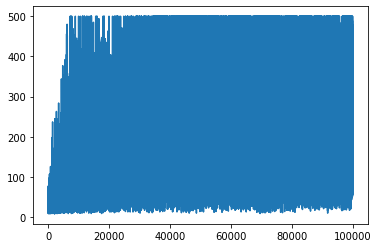

In [20]:
plt.plot(rewards)

從此圖表中，無法得出任何結論，因為由於隨機訓練過程的特性，訓練階段的長度差異很大。為了更好地理解此圖表，我們可以計算**移動平均**，例如100次實驗的平均值。這可以方便地使用 `np.convolve` 完成：


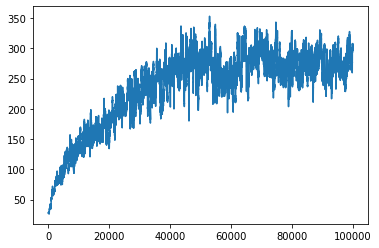

In [22]:
#code block 12

## 調整超參數並觀察結果

現在，實際看看訓練好的模型如何表現會很有趣。我們來運行模擬，並採用與訓練時相同的動作選擇策略：根據 Q-Table 中的概率分佈進行採樣：


In [23]:
# code block 13

## 將結果保存為動畫 GIF

如果你想讓朋友們刮目相看，你可能會想要將平衡桿的動畫 GIF 圖片發送給他們。為了達成這個目的，我們可以調用 `env.render` 來生成圖像幀，然後使用 PIL 庫將這些幀保存為動畫 GIF：


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**免責聲明**：  
本文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。雖然我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。原始文件的母語版本應被視為權威來源。對於關鍵資訊，建議使用專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或錯誤解釋不承擔責任。
